<a href="https://colab.research.google.com/github/seeedata/OUTTA-AI-BOOTCAMP/blob/main/Team%20Project%202_RankingPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 데이터 불러오기

파일의 이름에 숫자만 다른 것을 이용하여 반복문으로 한번에 데이터를 가져와 df에 할당합니다.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

#일반적으로 사용하는 데이터 파일 불러오는 방법
d1= pd.read_excel("test.xlsx")
d1.head()

,브랜드,상품명,카테고리,정가,할인가,아이디,별점,피부정보,피부타입,피부고민,자극도
0,구달,[홍현희 PICK/ 한정기획] 구달 청귤 비타C 잡티케어 세럼 50ml+50ml 리필기획,에센스/세럼,43000,28900,고먐미먼지,3,"복합성, 겨울쿨톤, 미백, 블랙헤드",지성에 좋아요,주름/미백에 좋아요,자극없이 순해요
1,구달,[홍현희 PICK/ 한정기획] 구달 청귤 비타C 잡티케어 세럼 50ml+50ml 리필기획,에센스/세럼,43000,28900,뚜딘,5,"복합성, 웜톤, 다크서클, 모공",복합성에 좋아요,주름/미백에 좋아요,자극없이 순해요
2,구달,[홍현희 PICK/ 한정기획] 구달 청귤 비타C 잡티케어 세럼 50ml+50ml 리필기획,에센스/세럼,43000,28900,수부지지만행복해묘,5,"지성, 겨울쿨톤, 모공, 미백",건성에 좋아요,주름/미백에 좋아요,자극없이 순해요
3,구달,[홍현희 PICK/ 한정기획] 구달 청귤 비타C 잡티케어 세럼 50ml+50ml 리필기획,에센스/세럼,43000,28900,뽀드득뽀드득,5,"민감성, 여름쿨톤, 민감성, 잡티",복합성에 좋아요,주름/미백에 좋아요,보통이에요
4,구달,[홍현희 PICK/ 한정기획] 구달 청귤 비타C 잡티케어 세럼 50ml+50ml 리필기획,에센스/세럼,43000,28900,comejuliet,5,"건성, 겨울쿨톤, 블랙헤드, 주름",건성에 좋아요,보습에 좋아요,자극없이 순해요


In [ ]:
d1.shape

(5000, 11)

In [ ]:
d2 = pd.read_excel("제공데이터/rank2.xlsx")
d5 = pd.read_excel("제공데이터/rank5.xlsx")
d8 = pd.read_excel("제공데이터/rank8.xlsx")

In [ ]:
def clean_data(dataframe):
    dataframe['정가'] = dataframe['정가'].apply(lambda x: x.replace(",", "")).astype(int)
    dataframe['할인가'] = dataframe['할인가'].apply(lambda x: x.replace(",", "")).astype(int)
    dataframe['별점'] = dataframe['별점'].apply(lambda x: x.split()[1][0]).astype(int)
    dataframe['피부정보'] = dataframe['피부정보'].apply(lambda x: x.replace(" ", ", "))
    return dataframe

In [ ]:
d2 = clean_data(d2)
d5 = clean_data(d5)
d8 = clean_data(d8)

In [ ]:
df = pd.concat([d1, d2, d5, d8], axis=0)

In [ ]:
df.shape

(8000, 11)

### 결측값 제거

크롤링 코드 작성 시 크롤링하지 못한 정보는 '없음'으로 저장하게 했기 때문에 '없음'의 갯수로 결측값의 갯수를 파악합니다.

In [ ]:
###############제공된 코드 건드리지 마세요 ###################

### 데이터 컬럼별 없음(결측치) 개수 파악

col_name = df.columns    #컬럼명 저장
from collections import Counter

for i in col_name:
    print(i,Counter(df[i])["없음"])

브랜드 0
상품명 0
카테고리 0
정가 0
할인가 0
아이디 0
별점 0
피부정보 3561
피부타입 4
피부고민 3
자극도 3


In [ ]:
#피부정보, 별점, 피부타입, 피부고민, 자극도 중 하나라도 값이 '없음'인 경우
df[df.apply(lambda row: row.astype(str).str.contains('없음').any(), axis=1)]

,브랜드,상품명,카테고리,정가,할인가,아이디,별점,피부정보,피부타입,피부고민,자극도
9,구달,[홍현희 PICK/ 한정기획] 구달 청귤 비타C 잡티케어 세럼 50ml+50ml 리필기획,에센스/세럼,43000,28900,요니양,5,없음,복합성에 좋아요,진정에 좋아요,보통이에요
19,구달,[홍현희 PICK/ 한정기획] 구달 청귤 비타C 잡티케어 세럼 50ml+50ml 리필기획,에센스/세럼,43000,28900,머핀이,4,없음,건성에 좋아요,주름/미백에 좋아요,자극이 느껴져요
28,구달,[홍현희 PICK/ 한정기획] 구달 청귤 비타C 잡티케어 세럼 50ml+50ml 리필기획,에센스/세럼,43000,28900,MiMi20,4,없음,건성에 좋아요,진정에 좋아요,자극이 느껴져요
29,구달,[홍현희 PICK/ 한정기획] 구달 청귤 비타C 잡티케어 세럼 50ml+50ml 리필기획,에센스/세럼,43000,28900,노라라,5,없음,복합성에 좋아요,진정에 좋아요,보통이에요
38,구달,[홍현희 PICK/ 한정기획] 구달 청귤 비타C 잡티케어 세럼 50ml+50ml 리필기획,에센스/세럼,43000,28900,사루별,5,없음,복합성에 좋아요,진정에 좋아요,자극이 느껴져요
...,...,...,...,...,...,...,...,...,...,...,...
995,닥터지,[2세대 천만크림] 닥터지 레드 블레미쉬 클리어 수딩 크림 70ml+30ml 세트,크림,38000,28800,neea****,5,없음,복합성에 좋아요,진정에 좋아요,보통이에요
996,닥터지,[2세대 천만크림] 닥터지 레드 블레미쉬 클리어 수딩 크림 70ml+30ml 세트,크림,38000,28800,you92****,5,없음,복합성에 좋아요,진정에 좋아요,보통이에요
997,닥터지,[2세대 천만크림] 닥터지 레드 블레미쉬 클리어 수딩 크림 70ml+30ml 세트,크림,38000,28800,gusrbs****,5,없음,건성에 좋아요,진정에 좋아요,자극없이 순해요
998,닥터지,[2세대 천만크림] 닥터지 레드 블레미쉬 클리어 수딩 크림 70ml+30ml 세트,크림,38000,28800,jjkkhjpj****,5,없음,지성에 좋아요,진정에 좋아요,보통이에요


In [ ]:
### 별점, 피부타입, 피부고민, 자극도 값이 없음은 제거한 데이터를 df2에 저장
df2= df[(df['피부정보']!='없음') & (df['피부타입']!='없음') & (df['피부고민']!= '없음') & (df['자극도']!='없음')]
df2.reset_index(drop=True, inplace=True)
df2.shape

(4436, 11)

In [ ]:
###############제공된 코드 건드리지 마세요 ###################
### 데이터 컬럼별 없음(결측치) 개수 파악

col_name = df2.columns    #컬럼명 저장
from collections import Counter

for i in col_name:
    print(i,Counter(df2[i])["없음"])

브랜드 0
상품명 0
카테고리 0
정가 0
할인가 0
아이디 0
별점 0
피부정보 0
피부타입 0
피부고민 0
자극도 0


### 정가, 할인가 데이터 타입 변경

정가,할인가의 쉼표를 제거하고 데이터 타입을 int64로 바꿔줍니다.

In [ ]:
df2.dtypes

브랜드     object
상품명     object
카테고리    object
정가       int64
할인가      int64
아이디     object
별점       int64
피부정보    object
피부타입    object
피부고민    object
자극도     object
dtype: object

### 아이디 컬럼 삭제

모델 학습 시 아이디 정보는 필요하지 않기 때문에 제거해줍니다.

In [ ]:
df2 = df2.drop(['아이디'], axis=1)
df2.head()

,브랜드,상품명,카테고리,정가,할인가,별점,피부정보,피부타입,피부고민,자극도
0,구달,[홍현희 PICK/ 한정기획] 구달 청귤 비타C 잡티케어 세럼 50ml+50ml 리필기획,에센스/세럼,43000,28900,3,"복합성, 겨울쿨톤, 미백, 블랙헤드",지성에 좋아요,주름/미백에 좋아요,자극없이 순해요
1,구달,[홍현희 PICK/ 한정기획] 구달 청귤 비타C 잡티케어 세럼 50ml+50ml 리필기획,에센스/세럼,43000,28900,5,"복합성, 웜톤, 다크서클, 모공",복합성에 좋아요,주름/미백에 좋아요,자극없이 순해요
2,구달,[홍현희 PICK/ 한정기획] 구달 청귤 비타C 잡티케어 세럼 50ml+50ml 리필기획,에센스/세럼,43000,28900,5,"지성, 겨울쿨톤, 모공, 미백",건성에 좋아요,주름/미백에 좋아요,자극없이 순해요
3,구달,[홍현희 PICK/ 한정기획] 구달 청귤 비타C 잡티케어 세럼 50ml+50ml 리필기획,에센스/세럼,43000,28900,5,"민감성, 여름쿨톤, 민감성, 잡티",복합성에 좋아요,주름/미백에 좋아요,보통이에요
4,구달,[홍현희 PICK/ 한정기획] 구달 청귤 비타C 잡티케어 세럼 50ml+50ml 리필기획,에센스/세럼,43000,28900,5,"건성, 겨울쿨톤, 블랙헤드, 주름",건성에 좋아요,보습에 좋아요,자극없이 순해요


### 별점에서 숫자만 남기기

현재 별점은 5점만점에 X점과 같은 형식으로 되어있습니다. 여기서 X만 남기고 데이터 타입을 int64로 바꿔줍니다.

In [ ]:
#데이터 수집 시 이미 해줌
df2.head()

,브랜드,상품명,카테고리,정가,할인가,별점,피부정보,피부타입,피부고민,자극도
0,구달,[홍현희 PICK/ 한정기획] 구달 청귤 비타C 잡티케어 세럼 50ml+50ml 리필기획,에센스/세럼,43000,28900,3,"복합성, 겨울쿨톤, 미백, 블랙헤드",지성에 좋아요,주름/미백에 좋아요,자극없이 순해요
1,구달,[홍현희 PICK/ 한정기획] 구달 청귤 비타C 잡티케어 세럼 50ml+50ml 리필기획,에센스/세럼,43000,28900,5,"복합성, 웜톤, 다크서클, 모공",복합성에 좋아요,주름/미백에 좋아요,자극없이 순해요
2,구달,[홍현희 PICK/ 한정기획] 구달 청귤 비타C 잡티케어 세럼 50ml+50ml 리필기획,에센스/세럼,43000,28900,5,"지성, 겨울쿨톤, 모공, 미백",건성에 좋아요,주름/미백에 좋아요,자극없이 순해요
3,구달,[홍현희 PICK/ 한정기획] 구달 청귤 비타C 잡티케어 세럼 50ml+50ml 리필기획,에센스/세럼,43000,28900,5,"민감성, 여름쿨톤, 민감성, 잡티",복합성에 좋아요,주름/미백에 좋아요,보통이에요
4,구달,[홍현희 PICK/ 한정기획] 구달 청귤 비타C 잡티케어 세럼 50ml+50ml 리필기획,에센스/세럼,43000,28900,5,"건성, 겨울쿨톤, 블랙헤드, 주름",건성에 좋아요,보습에 좋아요,자극없이 순해요


In [ ]:
df2.dtypes

브랜드     object
상품명     object
카테고리    object
정가       int64
할인가      int64
별점       int64
피부정보    object
피부타입    object
피부고민    object
자극도     object
dtype: object

### 피부정보 컬럼을 여러컬럼으로 구분

피부정보에는 최대 피부타입, 피부톤, 2개의 피부고민 총 4개로 이루어져 있습니다.  
해당 텍스트는 공백으로 구분되어있고 이를 이용해 4개의 컬럼(user피부타입/user피부톤/user피부고민1/user피부고민2)으로 만들어 줍니다.

In [ ]:
#힌트: split 함수

df2["user피부타입"] = df2['피부정보'].str.split(',', expand=True)[0]
df2["user피부톤"] = df2['피부정보'].str.split(',', expand=True)[1]
df2["user피부고민1"] = df2['피부정보'].str.split(',', expand=True)[2]
df2["user피부고민2"] = df2['피부정보'].str.split(',', expand=True)[3]
df2.head()

,브랜드,상품명,카테고리,정가,할인가,별점,피부정보,피부타입,피부고민,자극도,user피부타입,user피부톤,user피부고민1,user피부고민2
0,구달,[홍현희 PICK/ 한정기획] 구달 청귤 비타C 잡티케어 세럼 50ml+50ml 리필기획,에센스/세럼,43000,28900,3,"복합성, 겨울쿨톤, 미백, 블랙헤드",지성에 좋아요,주름/미백에 좋아요,자극없이 순해요,복합성,겨울쿨톤,미백,블랙헤드
1,구달,[홍현희 PICK/ 한정기획] 구달 청귤 비타C 잡티케어 세럼 50ml+50ml 리필기획,에센스/세럼,43000,28900,5,"복합성, 웜톤, 다크서클, 모공",복합성에 좋아요,주름/미백에 좋아요,자극없이 순해요,복합성,웜톤,다크서클,모공
2,구달,[홍현희 PICK/ 한정기획] 구달 청귤 비타C 잡티케어 세럼 50ml+50ml 리필기획,에센스/세럼,43000,28900,5,"지성, 겨울쿨톤, 모공, 미백",건성에 좋아요,주름/미백에 좋아요,자극없이 순해요,지성,겨울쿨톤,모공,미백
3,구달,[홍현희 PICK/ 한정기획] 구달 청귤 비타C 잡티케어 세럼 50ml+50ml 리필기획,에센스/세럼,43000,28900,5,"민감성, 여름쿨톤, 민감성, 잡티",복합성에 좋아요,주름/미백에 좋아요,보통이에요,민감성,여름쿨톤,민감성,잡티
4,구달,[홍현희 PICK/ 한정기획] 구달 청귤 비타C 잡티케어 세럼 50ml+50ml 리필기획,에센스/세럼,43000,28900,5,"건성, 겨울쿨톤, 블랙헤드, 주름",건성에 좋아요,보습에 좋아요,자극없이 순해요,건성,겨울쿨톤,블랙헤드,주름


#### user피부타입 컬럼에서 복합성/건성/지성/민감성/트러블성/약건성/중성 을 제외하고 모두 np.NaN 처리 해줍니다.  

In [ ]:
#user피부타입에서 해당하지 않는 값은 nan 처리
skin_type = ['복합성', '건성', '지성', '민감성', '트러블성', '약건성', '중성']
def to_nan(x):
    if x not in skin_type:
        return np.NaN
    else:
        return x

df2["user피부타입"] = df2['user피부타입'].apply(to_nan)
df2["user피부타입"].value_counts()

복합성     1935
건성      1104
지성       622
민감성      419
트러블성     210
약건성       56
중성        54
Name: user피부타입, dtype: int64

#### user피부고민2의 결측값을 user피부톤 컬럼값으로 채운 후  (웜톤/쿨톤/여름쿨톤/봄웜톤/가을웜톤/겨울쿨톤) 값을  np.NaN 처리 해줍니다.

In [ ]:
skin_tone = [' 웜톤', ' 쿨톤', ' 여름쿨톤', ' 봄웜톤', ' 가을웜톤', ' 겨울쿨톤']
def to_nan_피부고민2(x):
    if x in skin_tone:
        return np.NaN
    else:
        return x

df2["user피부고민2"] = df2["user피부고민2"].apply(to_nan_피부고민2)
df2["user피부고민2"].value_counts()

 모공      796
 미백      523
 민감성     514
 잡티      467
 블랙헤드    421
 트러블     318
 다크서클    203
 탄력      146
 주름      114
 홍조       63
 아토피      47
 피지과다     28
Name: user피부고민2, dtype: int64

### user피부타입, usesr피부고민1, user피부고민2 에서 결측값 제거

In [ ]:
df2.isnull().sum()

브랜드            0
상품명            0
카테고리           0
정가             0
할인가            0
별점             0
피부정보           0
피부타입           0
피부고민           0
자극도            0
user피부타입      36
user피부톤       87
user피부고민1    234
user피부고민2    796
dtype: int64

In [ ]:
df2 = df2.dropna(subset=['user피부타입', 'user피부톤', 'user피부고민1', 'user피부고민2'])
df2.isnull().sum()

브랜드          0
상품명          0
카테고리         0
정가           0
할인가          0
별점           0
피부정보         0
피부타입         0
피부고민         0
자극도          0
user피부타입     0
user피부톤      0
user피부고민1    0
user피부고민2    0
dtype: int64

In [ ]:
df2.head()

,브랜드,상품명,카테고리,정가,할인가,별점,피부정보,피부타입,피부고민,자극도,user피부타입,user피부톤,user피부고민1,user피부고민2
0,구달,[홍현희 PICK/ 한정기획] 구달 청귤 비타C 잡티케어 세럼 50ml+50ml 리필기획,에센스/세럼,43000,28900,3,"복합성, 겨울쿨톤, 미백, 블랙헤드",지성에 좋아요,주름/미백에 좋아요,자극없이 순해요,복합성,겨울쿨톤,미백,블랙헤드
1,구달,[홍현희 PICK/ 한정기획] 구달 청귤 비타C 잡티케어 세럼 50ml+50ml 리필기획,에센스/세럼,43000,28900,5,"복합성, 웜톤, 다크서클, 모공",복합성에 좋아요,주름/미백에 좋아요,자극없이 순해요,복합성,웜톤,다크서클,모공
2,구달,[홍현희 PICK/ 한정기획] 구달 청귤 비타C 잡티케어 세럼 50ml+50ml 리필기획,에센스/세럼,43000,28900,5,"지성, 겨울쿨톤, 모공, 미백",건성에 좋아요,주름/미백에 좋아요,자극없이 순해요,지성,겨울쿨톤,모공,미백
3,구달,[홍현희 PICK/ 한정기획] 구달 청귤 비타C 잡티케어 세럼 50ml+50ml 리필기획,에센스/세럼,43000,28900,5,"민감성, 여름쿨톤, 민감성, 잡티",복합성에 좋아요,주름/미백에 좋아요,보통이에요,민감성,여름쿨톤,민감성,잡티
4,구달,[홍현희 PICK/ 한정기획] 구달 청귤 비타C 잡티케어 세럼 50ml+50ml 리필기획,에센스/세럼,43000,28900,5,"건성, 겨울쿨톤, 블랙헤드, 주름",건성에 좋아요,보습에 좋아요,자극없이 순해요,건성,겨울쿨톤,블랙헤드,주름


In [ ]:
df2.shape

(3640, 14)

### df2를 df3에 복사한 후 상품명컬럼의 값을 간단하게 변경해줍니다.
* 대용량 한정기획] 구달 청귤 비타C 잡티케어 세럼 50ml+31ml 증정 기획                                     : goodal
* [1등 국민미스트] 달바 화이트 트러플 퍼스트 스프레이 세럼 100ml + 100ml 기획세트                        : dalba_mist
* 성분에디터 그린토마토 포어 리프팅 앰플 플러스 30ml+10ml 기획                                           : sungboon
* [2세대 천만크림] 닥터지 레드 블레미쉬 클리어 수딩 크림 70ml+30ml 세트                                  : dr_g
* 라로슈포제 NEW 시카플라스트 밤B5+ 100ml 기획(+시카토너 50ml 증정)                                      : larocheposay
* [100ml+100ml/단독기획] 토리든 다이브인 저분자 히알루론산 수딩크림 더블기획                             : torriden_cream
* 에스트라 아토베리어365 크림 80ml 기획 (+하이드로에센스 25ml+무기자차선크림10ml 증정)(2305)             : aestura_cream
* 에스트라 아토베리어365 로션 150ml 기획 (+하이드로에센스 25ml+무기자차선크림10ml 증정)                  : aestura_lotion
* [단독기획] 토리든 다이브인 저분자 히알루론산 세럼 더블기획 (50ml+50ml)                                 : torriden_serum
* [5월 올영픽/대용량] 파티온 노스카나인 트러블 세럼 단독 기획(50ml+15ml)                                 : fation
* [쿵야 키링&스티커 증정] V&A 안티옥시던트 래디언스 앰플 더블 기획 (30ml+30ml)                           : V&A
* [박은빈 PICK] 한율 어린쑥 수분진정크림 55ml 기획(+45ml 리필 증정)                                      : hanyul

In [ ]:
df2['브랜드'].unique()

array(['구달', '성분에디터', '토리든', '에스네이처', '아누아', '달바', '에스트라', '닥터지'],
      dtype=object)

In [ ]:
df3=df2.copy()

#상품명 간소화
def name_min(x):
    if x == '구달':
        return "goodal"
    elif x == '성분에디터':
        return "sungboon"
    elif x == '토리든':
        return "torriden"
    elif x == '에스네이처':
        return "s_nature"
    elif x == '아누아':
        return "anua"
    elif x =="달바":
        return "d_alba"
    elif x == "에스트라":
        return "aestura"
    elif x == "닥터지":
        return "dr_g"

df3["상품명"] = df3['브랜드'].apply(name_min)
df3.head()

,브랜드,상품명,카테고리,정가,할인가,별점,피부정보,피부타입,피부고민,자극도,user피부타입,user피부톤,user피부고민1,user피부고민2
0,구달,goodal,에센스/세럼,43000,28900,3,"복합성, 겨울쿨톤, 미백, 블랙헤드",지성에 좋아요,주름/미백에 좋아요,자극없이 순해요,복합성,겨울쿨톤,미백,블랙헤드
1,구달,goodal,에센스/세럼,43000,28900,5,"복합성, 웜톤, 다크서클, 모공",복합성에 좋아요,주름/미백에 좋아요,자극없이 순해요,복합성,웜톤,다크서클,모공
2,구달,goodal,에센스/세럼,43000,28900,5,"지성, 겨울쿨톤, 모공, 미백",건성에 좋아요,주름/미백에 좋아요,자극없이 순해요,지성,겨울쿨톤,모공,미백
3,구달,goodal,에센스/세럼,43000,28900,5,"민감성, 여름쿨톤, 민감성, 잡티",복합성에 좋아요,주름/미백에 좋아요,보통이에요,민감성,여름쿨톤,민감성,잡티
4,구달,goodal,에센스/세럼,43000,28900,5,"건성, 겨울쿨톤, 블랙헤드, 주름",건성에 좋아요,보습에 좋아요,자극없이 순해요,건성,겨울쿨톤,블랙헤드,주름


### 브랜드, 피부정보, user피부톤 컬럼을 삭제합니다.

In [ ]:
df3 = df3.drop(['브랜드', '피부정보', 'user피부톤'], axis=1)

In [ ]:
df3.head()

,상품명,카테고리,정가,할인가,별점,피부타입,피부고민,자극도,user피부타입,user피부고민1,user피부고민2
0,goodal,에센스/세럼,43000,28900,3,지성에 좋아요,주름/미백에 좋아요,자극없이 순해요,복합성,미백,블랙헤드
1,goodal,에센스/세럼,43000,28900,5,복합성에 좋아요,주름/미백에 좋아요,자극없이 순해요,복합성,다크서클,모공
2,goodal,에센스/세럼,43000,28900,5,건성에 좋아요,주름/미백에 좋아요,자극없이 순해요,지성,모공,미백
3,goodal,에센스/세럼,43000,28900,5,복합성에 좋아요,주름/미백에 좋아요,보통이에요,민감성,민감성,잡티
4,goodal,에센스/세럼,43000,28900,5,건성에 좋아요,보습에 좋아요,자극없이 순해요,건성,블랙헤드,주름


### 컬럼명을 변경해줍니다.
* 피부타입 -> 효과1  
* 피부고민 -> 효과2  
* user피부타입 -> 피부타입  
* user피부고민1 -> 피부고민1  
* user피부고민2 -> 피부고민2

In [ ]:
df3.rename(columns = {"피부타입": "효과1", "피부고민":"효과2", "user피부타입":"피부타입", "user피부고민1":"피부고민1", "user피부고민2":"피부고민2"}, inplace=True)
df3.head()

,상품명,카테고리,정가,할인가,별점,효과1,효과2,자극도,피부타입,피부고민1,피부고민2
0,goodal,에센스/세럼,43000,28900,3,지성에 좋아요,주름/미백에 좋아요,자극없이 순해요,복합성,미백,블랙헤드
1,goodal,에센스/세럼,43000,28900,5,복합성에 좋아요,주름/미백에 좋아요,자극없이 순해요,복합성,다크서클,모공
2,goodal,에센스/세럼,43000,28900,5,건성에 좋아요,주름/미백에 좋아요,자극없이 순해요,지성,모공,미백
3,goodal,에센스/세럼,43000,28900,5,복합성에 좋아요,주름/미백에 좋아요,보통이에요,민감성,민감성,잡티
4,goodal,에센스/세럼,43000,28900,5,건성에 좋아요,보습에 좋아요,자극없이 순해요,건성,블랙헤드,주름


In [ ]:
df3.shape

(3640, 11)

## 데이터 인코딩

In [ ]:
df3["자극도"].value_counts()

자극없이 순해요    2906
보통이에요        684
자극이 느껴져요      50
Name: 자극도, dtype: int64

### 직접 함수를 만들어 자극도 컬럼을 레이블인코딩 합니다.
* 자극없이 순해요 -> 0
* 보통이에요 -> 1
* 자극이 느껴져요 -> 2

In [ ]:
def 자극도인코딩(x):
    if x == "자극없이 순해요":
        return 0
    elif x == "보통이에요":
        return 1
    elif x == "자극이 느껴져요":
        return 2


df3["자극도"]=df3['자극도'].apply(자극도인코딩)
df3["자극도"].value_counts()

0    2906
1     684
2      50
Name: 자극도, dtype: int64

### 상품명, 카테고리, 효과1, 효과2, 피부타입, 피부고민1, 피부고민2 은  get_dummies를 이용해 원핫인코딩을 합니다.
결과를 df4에 저장합니다.

In [ ]:
df4= pd.get_dummies(df3, columns = ['상품명', '카테고리', '효과1', '효과2', '피부타입', '피부고민1', '피부고민2'])
df4.head()

,정가,할인가,별점,자극도,상품명_aestura,상품명_anua,상품명_d_alba,상품명_dr_g,상품명_goodal,상품명_s_nature,...,피부고민2_ 미백,피부고민2_ 민감성,피부고민2_ 블랙헤드,피부고민2_ 아토피,피부고민2_ 잡티,피부고민2_ 주름,피부고민2_ 탄력,피부고민2_ 트러블,피부고민2_ 피지과다,피부고민2_ 홍조
0,43000,28900,3,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
1,43000,28900,5,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,43000,28900,5,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
3,43000,28900,5,1,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,43000,28900,5,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


# 랜덤포레스트

#### 피처값과 타겟값을 지정해줍니다. (target : 별점, 피처는 별점 제외 모든 컬럼)

In [ ]:
feature = df4.loc[:, df4.columns != "별점"]
target= df4.loc[:, "별점"]

#### 저장한 피처와 타겟을 가지고 train : test 데이터를 8:2로 나누어 줍니다. random_state = 50

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size=0.2, random_state=50)

#### df4의 별점의 분포를 막대그래프로 시각화하여 불균형한지 확인합니다.

<AxesSubplot: >

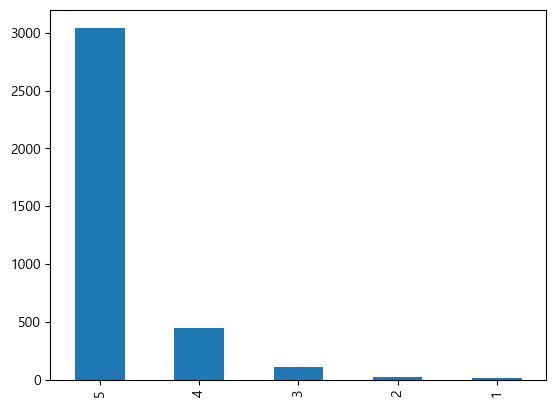

In [ ]:
#한글 깨짐 방지
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

#막대그래프 코드 작성
target.value_counts().sort_values(ascending=False).plot.bar()

### 불균형한 데이터 샘플링 SMOTE 활용

In [ ]:
#불균형 데이터 오버샘플링 SMOTE
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

print("SMOTE 적용 전 train 데이터셋 shape : ", X_train.shape, y_train.shape)
print('SMOTE 적용 후 train 데이터셋 shape :', X_train_over.shape, y_train_over.shape)
print('SMOTE 적용 후 train 타겟 별점 분포',y_train_over.value_counts() )

SMOTE 적용 전 train 데이터셋 shape :  (2912, 51) (2912,)
SMOTE 적용 후 train 데이터셋 shape : (12170, 51) (12170,)
SMOTE 적용 후 train 타겟 별점 분포 5    2434
4    2434
3    2434
2    2434
1    2434
Name: 별점, dtype: int64


### 데이터 스케일링
피처의 단위를 동일하게 만들기 위해 StandardScaler로 스케일링을 진행합니다.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train_over)
X_test_scaled = scaler.fit_transform(X_test)

### 그리드서치로 최적의 파라미터 찾기
1. 지정할 파라미터와 값을 params에 저장합니다.  
2. 랜덤포레스트 모델을 생성하고 rfc로 할당합니다. (random_state=100, n_jobs=-1)  
3. 그리드서치를 실행하여 grid_cv로 할당합니다. (cv=3, n_jobs=-1)
4. 스케일링 완료한 훈련 데이터를 grid_cv에 fit해줍니다.
5. 최적의 파라미터를 print 합니다.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

#각 파라미터 값 넣기
params = { 'n_estimators' : [30, 50, 70, 90, 110],
           'max_depth' : [3, 4, 5, 6, 7, 8],
           'max_features': [10, 20, 30, 40, 50],
           'min_samples_split' : [10, 20, 30, 40, 50]
            }


rfc = RandomForestClassifier(random_state=100, n_jobs=-1)
grid_cv = GridSearchCV(estimator = rfc, param_grid = params, scoring="accuracy", cv = 3, n_jobs=-1)     # cv는 교차 검증을 위해 분할되는 학습 데이터의 세트 수
grid_cv.fit(X_train_scaled, y_train_over)

print(f'최적 파라미터: {grid_cv.best_params_}')

최적 파라미터: {'max_depth': 8, 'max_features': 20, 'min_samples_split': 10, 'n_estimators': 50}


### 랜덤포레스트 모델 훈련
위에서 구한 최적 파라미터를 활용하여 랜덤포레스트 모델을 만들고 해당 모델로 다시 훈련시킵니다. random_state=100, n_jobs=-1

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc= RandomForestClassifier(max_depth=8, max_features=20, min_samples_split=10, n_estimators=50, random_state=100, n_jobs=-1)
rfc.fit(X_train_scaled, y_train_over)

RandomForestClassifier(max_depth=8, max_features=20, min_samples_split=10,
                       n_estimators=50, n_jobs=-1, random_state=100)

 ### 모델 평가지표 결과값이 한번에 나오도록 함수 만들기
 함수에 y_test와 pred를 입력하면 정확도, 정밀도, 재현율, f1스코어가 데이터 프레임으로 나오도록 함수를 만듭니다.  
 단, 정확도, 정밀도, 재현율, f1스코어의 average는 모두 'micro'로 설정  
 딕셔너리를 활용하여 데이터 프레임을 만들어주세요.  

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score


def _metrics(y_test, pred):
    acc= accuracy_score(y_test, pred)
    precision= precision_score(y_test, pred, average='micro')
    recall= recall_score(y_test, pred, average='micro')
    f1=f1_score(y_test, pred, average='micro')

    dict_metrics= {"accuracy":acc, "precision":precision, "recall":recall, "f1_score":f1}
    df_metrics=pd.DataFrame(dict_metrics, index=[0])

    return df_metrics

#### 스케일링한 test데이터를 가지고 모델에 적용하여 나온 예측값을 pred에 할당하고 평가지표함수로 성능을 확인합니다.

In [ ]:
pred = rfc.predict(X_test_scaled)

_metrics(y_test,pred)

,accuracy,precision,recall,f1_score
0,0.537088,0.537088,0.537088,0.537088


### 피처 중요도 확인하기

피처 중요도 값을 저장한 feat_importance 값을 내림차순하여 20개만 top_20에 할당합니다.  
그 값을 가지고 barplot을 만들어 줍니다.
* 제목 : 피처 중요도 Top2 20
* figsize = (8,6)

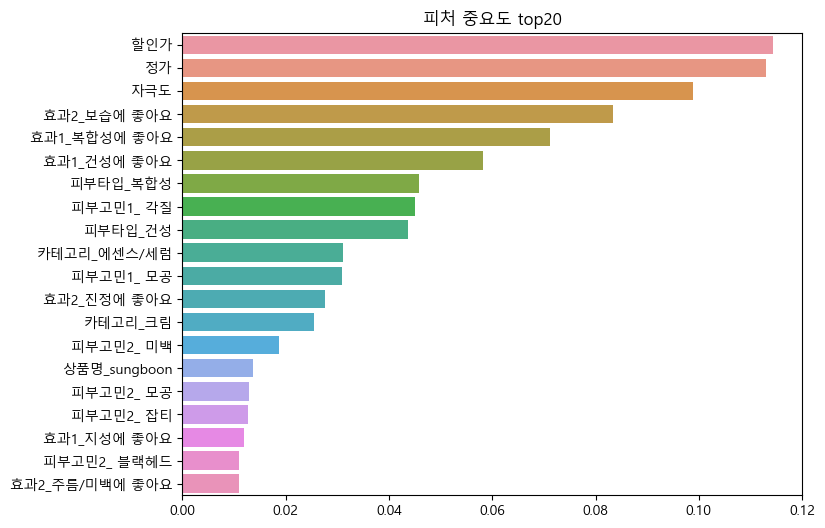

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#제공 코드
feat_importance = pd.Series(rfc.feature_importances_, index=feature.columns)

top20 = feat_importance.sort_values(ascending=False)[:20]

#한글 깨짐 방지
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False


plt.figure(figsize=(8,6))
plt.title("피처 중요도 top20")
sns.barplot(x=top20.values, y=top20.index.values)
plt.show()

### 혼동행렬
y_test와 예측값 pred를 이용하여 혼동행렬 생성하여 cf에 할당합니다.

In [ ]:
from sklearn.metrics import confusion_matrix

cf = confusion_matrix(y_test, pred)
cf

array([[  0,   0,   0,   0,   0],
       [  0,   1,   0,   1,   2],
       [  3,   1,   3,   1,   9],
       [ 11,   7,  14,  10,  52],
       [ 75,  54,  31,  76, 377]], dtype=int64)

### 혼동행렬 시각화
cf를 데이터 프레임(cf_matrix)으로 만든 후 컬럼명과, 인덱스를 1~5점으로 저장합니다.   
데이터 프레임을 heatmap으로 만들어 줍니다. ( annot=True  -> 각 셀에 숫자 입력 , fmt='d'  -> 정수형으로 나오도록함)   
x라벨 : 예측값, y라벨 : 실제값

In [ ]:
cf_matrix= pd.DataFrame(cf)
cf_matrix

,0,1,2,3,4
0,0,0,0,0,0
1,0,1,0,1,2
2,3,1,3,1,9
3,11,7,14,10,52
4,75,54,31,76,377


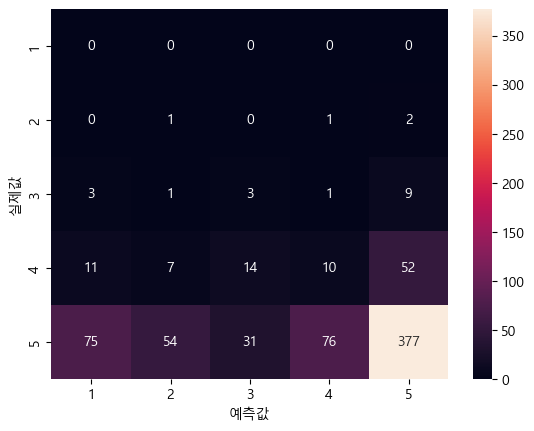

In [ ]:
cf_matrix= pd.DataFrame(cf)
cf_matrix.columns = [1, 2, 3, 4, 5]
cf_matrix.index = [1, 2, 3, 4, 5]

#히트맵 코드 작성
sns.heatmap(cf_matrix, annot=True, fmt='d')
plt.xlabel("예측값")
plt.ylabel("실제값")
plt.show()

# KNN

### 랜덤포레스트와 데이터 스케일링까지 과정이 반복됨

In [ ]:
#데이터 다시 확인해보기
df4.head()

,정가,할인가,별점,자극도,상품명_aestura,상품명_anua,상품명_d_alba,상품명_dr_g,상품명_goodal,상품명_s_nature,...,피부고민2_ 미백,피부고민2_ 민감성,피부고민2_ 블랙헤드,피부고민2_ 아토피,피부고민2_ 잡티,피부고민2_ 주름,피부고민2_ 탄력,피부고민2_ 트러블,피부고민2_ 피지과다,피부고민2_ 홍조
0,43000,28900,3,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
1,43000,28900,5,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,43000,28900,5,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
3,43000,28900,5,1,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,43000,28900,5,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


#### 피처값과 타겟값  (target : 별점, 피처는 별점 제외 모든 컬럼)

In [ ]:
features=df4.loc[:, df4.columns != "별점"]
target= df4.loc[:, '별점']

#### 저장한 피처와 타겟을 가지고 train : test 데이터를 8:2로 나누어 줍니다. random_state = 50

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

#train/test 데이터 분리 8:2로
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=50)

#### 불균형 데이터 smote로 오버샘플링

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

#### 피처의 단위를 동일하게 만들기 위해 StandardScaler로 스케일링을 진행합니다.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train_over)
X_test_scaled = scaler.fit_transform(X_test)

### 그리드서치로 최적의 파라미터 찾기
1. 지정할 파라미터와 값을 knn_params에 저장합니다.  
2. KNN 모델을 생성하고 knn으로 할당합니다. (n_jobs=-1)  
3. 그리드서치를 실행하여 grid_cv로 할당합니다. (cv=5, n_jobs=-1)
4. 스케일링 완료한 훈련 데이터를 grid_cv에 fit해줍니다.
5. 최적의 파라미터를 print 합니다.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

#각 파라미터 값 넣기
knn_params = {
    'n_neighbors' : [3, 4, 5, 6, 7, 8, 9, 10],
    'weights' : ['uniform', 'distance']
}

knn= KNeighborsClassifier(n_jobs=-1)

grid_cv=GridSearchCV(estimator=knn, param_grid=knn_params, scoring="accuracy", cv=5, n_jobs=-1)
grid_cv.fit(X_train_scaled,y_train_over)


print(f'최적 하이퍼 파라미터: {grid_cv.best_params_}')

최적 하이퍼 파라미터: {'n_neighbors': 4, 'weights': 'distance'}


### KNN 모델 훈련
위에서 구한 최적 파라미터를 활용하여 knn 모델을 만들고 해당 모델로 다시 훈련시킵니다. n_jobs=-1

In [ ]:
knn=KNeighborsClassifier(n_jobs=-1, n_neighbors=4, weights='distance')
knn.fit(X_train_scaled,y_train_over)

KNeighborsClassifier(n_jobs=-1, n_neighbors=4, weights='distance')

#### 스케일링한 test데이터를 가지고 모델에 적용하여 나온 예측값을 knn_pred에 할당하고 평가지표함수로 성능을 확인합니다.

In [ ]:
knn_pred= knn.predict(X_test_scaled)

_metrics(y_test, knn_pred)

,accuracy,precision,recall,f1_score
0,0.498626,0.498626,0.498626,0.498626


### 혼동행렬
y_test와 예측값 knn_pred를 이용하여 혼동행렬 생성하여 knn_cf에 할당합니다.

In [ ]:
from sklearn.metrics import confusion_matrix

knn_cf = confusion_matrix(y_test, knn_pred)
knn_cf

array([[  0,   0,   0,   0,   0],
       [  0,   0,   0,   4,   0],
       [  0,   0,   6,   8,   3],
       [  2,   3,  24,  23,  42],
       [  6,  10,  60, 203, 334]], dtype=int64)

### 혼동행렬 시각화
knn_cf를 데이터 프레임(knn_cf_matrix)으로 만든 후 컬럼명과, 인덱스를 1~5점으로 저장합니다.   
데이터 프레임을 heatmap으로 만들어 줍니다. ( annot=True  -> 각 셀에 숫자 입력 , fmt='d'  -> 정수형으로 나오도록함)   
x라벨 : 예측값, y라벨 : 실제값

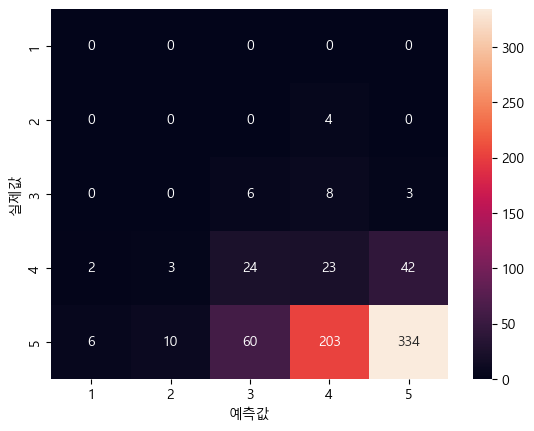

In [ ]:
knn_cf_matrix= pd.DataFrame(knn_cf)
knn_cf_matrix.columns = [1, 2, 3, 4, 5]
knn_cf_matrix.index = [1, 2, 3, 4, 5]

#히트맵 코드 작성
sns.heatmap(knn_cf_matrix, annot=True, fmt='d')
plt.xlabel("예측값")
plt.ylabel("실제값")
plt.show()